In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from util import *
import yaml
import os
from pathlib import Path
plt.switch_backend('agg')
######################################
###  Load parameters of the system ###
######################################

dirPath = str(Path(os.getcwd()).parent.absolute())

with open(dirPath + '/config.yml', 'r') as f:
    aux = yaml.load(f,  Loader=yaml.FullLoader)
config = dict2namespace(aux)

######################
###  Load resutls ####
######################


pilot_dic = {dirPath + '/results/langevin_Htrue': 'H true',
             dirPath + '/results/langevin_Hhat_pilot1': 64 * 1,
             dirPath + '/results/langevin_Hhat_pilot06': np.floor(64 * 0.6),
             dirPath + '/results/langevin_Hhat_pilot06mas5': np.floor(64 * 0.6) + 5,
             dirPath + '/results/langevin_Hhat_pilot1mas5': np.floor(64 * 1) + 5,
             dirPath + '/results/langevin_Hhat_pilot1mas5_1550levels': str(np.floor(64 * 1) + 5) + '- 1550 levels'}


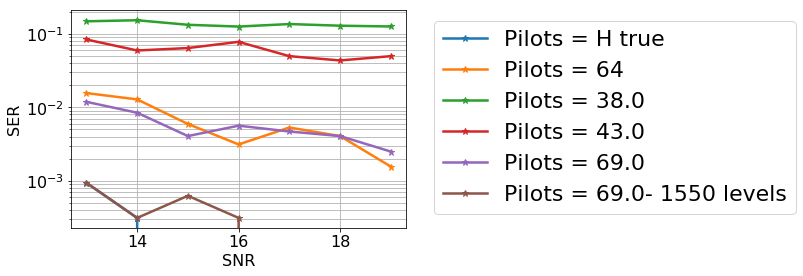

In [9]:
################################################################################
#
####                               PLOTS
#
################################################################################
plt.rcParams['font.size'] = 22

mar_size = 6.5
lin_width = 2.5
plt.figure(1)


for key in pilot_dic:
    with open(key, "rb") as input_file:
        serLangevin_pilot = pkl.load(input_file)
    plt.semilogy(config.SNR_dBs[config.NT], serLangevin_pilot, label= r'Pilots = ' + str(pilot_dic[key]), marker = '*', linewidth=lin_width , markersize=mar_size)
# plt.semilogy(config.SNR_dBs[config.NT], lang_true_5traj, label= '5 trajectories', marker = '*', linewidth=lin_width , markersize=mar_size)
# plt.semilogy(config.SNR_dBs[config.NT], lang_true_10traj, label= '10 trajectories' , marker = '*', linewidth=lin_width , markersize=mar_size)
# plt.semilogy(config.SNR_dBs[config.NT], serLangevin , label= '20 trajectories', marker = '*', linewidth=lin_width , markersize=mar_size)
# # plt.semilogy(config.SNR_dBs[config.NT], lang_true_40traj , label= '40 trajectories', marker = 'v')


plt.grid(True, which="both")
plt.legend(bbox_to_anchor=(1.05, 1.0))
# plt.ylim([1e-5, 1.2e-1])
plt.xlabel('SNR', fontsize=16)
plt.ylabel('SER', fontsize=16)
plt.tick_params(axis='both' , labelsize=16)
# plt.tight_layout()
plt.show()